# Read imdb reviews, execute linear regression training and then predict if a comment is positive or negative

In [1]:
# import libraries
import pandas as pd
import numpy as np
import collections as cll

In [2]:
# import the dataset
dataset = pd.read_csv('imdb-reviews-pt-br.csv')
y = dataset.iloc[:,-1].values
dataset["treatment"] = dataset["text_pt"]

In [3]:
# check the balance of dependent variable
cll.Counter(y)

Counter({'neg': 24765, 'pos': 24694})

In [4]:
# encode the dependent variable in 0 or 1 instead of negative or positive
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [5]:
# show the first 5 entries
dataset.head()

,id,text_en,text_pt,sentiment,treatment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,"Mais uma vez, o Sr. Costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,Este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,"Primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,Nem mesmo os Beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,Filmes de fotos de latão não é uma palavra apr...


In [6]:
# importing more libraries
import re
import nltk
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# variables
words_freq_data = pd.DataFrame()

# calc the words frequency
def wordsFrequencyCalc():
    global dataset, words_freq_data
    
    # get all words
    words = ' '.join([texto for texto in dataset.treatment])

    # breaks the text using white spaces
    token_space = tokenize.WhitespaceTokenizer()

    # breaks the text using punct
    token_punct = tokenize.WordPunctTokenizer()

    # tokenize the words
    token_words = token_space.tokenize(words)

    # get the words frequency
    words_freq = nltk.FreqDist(token_words)

    # create a dataframe to print the words frequency
    words_freq_data = pd.DataFrame({"Word": list(words_freq.keys()),"Frequency": list(words_freq.values())})

# show the n most frequent words
def wordsFrequencyList(n):
    global dataset, words_freq_data
    wordsFrequencyCalc()
    print(words_freq_data.nlargest(columns = "Frequency", n = n))

# show the 20 most frequent words in barsplot graph
def wordsFrequencyBar(n):
    global dataset, words_freq_data
    wordsFrequencyCalc()
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(data = words_freq_data.nlargest(columns = "Frequency", n = n), x = "Word", y = "Frequency", color = 'gray')
    barplot.set(ylabel="Contagem")
    plt.show()

In [7]:
wordsFrequencyList(20)

      Word  Frequency
20      de     417651
14     que     325070
42       e     299743
3        o     244881
7       um     216410
102      a     210179
45       é     192381
200     em     132778
1      uma     130888
29     não     127915
116   para     126556
8    filme     117543
13      do     101737
32     com      99174
67    como      78361
96      os      73766
151     se      72245
27      eu      68814
235    mas      64788
389     da      61901


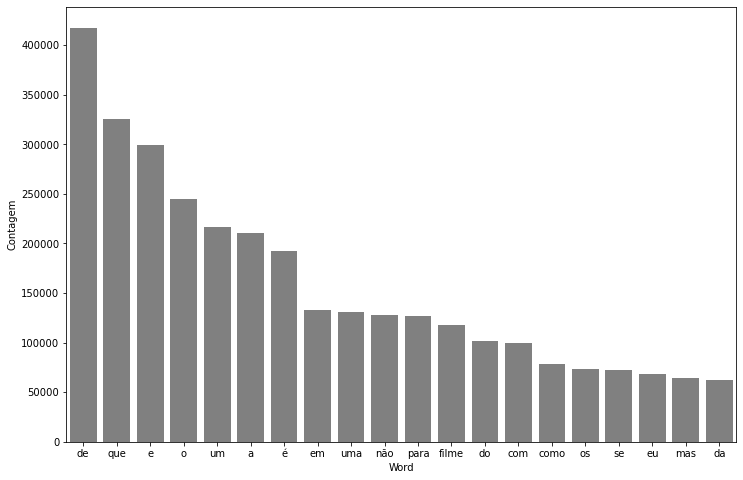

In [8]:
wordsFrequencyBar(20)

In [9]:
# get nltk version
nltk.__version__

'3.6.7'

In [10]:
# import more libraries
from string import punctuation
from nltk.stem import PorterStemmer
import unicodedata

# objects
words_banned = nltk.corpus.stopwords.words("portuguese")
token_punct = tokenize.WordPunctTokenizer()
stemmer = PorterStemmer()

# ban puncts
for p in punctuation:
    words_banned.append(p)

# ban some custom words
custom_words = "tambem historia"
# split the words and return as an array
custom_words = custom_words.split()

# add some custom words
for p in custom_words:
    words_banned.append(p)

# remove letters with punct and morphological variants
aux_pos = 0
for word_banned in words_banned:
    word_banned = unicodedata.normalize("NFD", word_banned)
    word_banned = word_banned.encode("ascii", "ignore")
    word_banned = word_banned.decode("utf-8")
    
    words_banned[aux_pos] = stemmer.stem(word_banned)
    aux_pos += 1

# remove possible duplicated words
words_banned = list(dict.fromkeys(words_banned))

# remove banned words
dataset_position = 0
for text in dataset.treatment:
    phrase = list()
    # tokenize the text
    phrase_tokenized = token_punct.tokenize(text)
    stemmer = PorterStemmer()
    # treat the words
    for word in phrase_tokenized:
        # remove words with punct
        word = unicodedata.normalize("NFD", word)
        word = word.encode("ascii", "ignore")
        word = word.decode("utf-8")

        # remove capital letters
        word = word.lower()
        
        # remove morphological variants
        word = stemmer.stem(word)
        
        # if the word is not banned, add to the phrase
        if word not in words_banned:
            phrase.append(word)
            
    # append as one phrase
    phrase_processed = ' '.join(phrase)
    
    # save in the dataframe
    dataset.loc[dataset_position,'treatment'] = phrase_processed
    
    # increment the row position
    dataset_position += 1

In [11]:
print(words_banned)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mai', 'as', 'como', 'ma', 'ao', 'ele', 'seu', 'sua', 'ou', 'quando', 'muito', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entr', 'depoi', 'sem', 'mesmo', 'quem', 'me', 'ess', 'voce', 'essa', 'num', 'nem', 'meu', 'minha', 'numa', 'qual', 'lhe', 'dele', 'est', 'tu', 'te', 'vo', 'teu', 'tua', 'nosso', 'nossa', 'dela', 'esta', 'aquel', 'aquela', 'isto', 'aquilo', 'estou', 'estamo', 'estao', 'estiv', 'estev', 'estivemo', 'estiveram', 'estava', 'estavamo', 'estavam', 'estivera', 'estiveramo', 'esteja', 'estejamo', 'estejam', 'estivess', 'estivessemo', 'estivessem', 'estivermo', 'estiverem', 'hei', 'ha', 'havemo', 'hao', 'houv', 'houvemo', 'houveram', 'houvera', 'houveramo', 'haja', 'hajamo', 'hajam', 'houvess', 'houvessemo', 'houvessem', 'houver', 'houvermo', 'houverem', 'houverei', 'houveremo', 'houverao', 'houveria', 'houveriamo', 'houveriam', 'sou', 'som

In [12]:
dataset.head()

,id,text_en,text_pt,sentiment,treatment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,vez sr costner arrum film tempo necessario ale...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,exemplo motivo maioria film acao generico chat...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeiro tudo odeio rap imbeci poderiam agir a...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,beatl puderam escrev musica todo gostassem emb...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,film foto latao palavra apropriada verdad tant...


In [13]:
wordsFrequencyList(20)

         Word  Frequency
4        film     186858
60        ser      34175
132      todo      33073
57       sobr      29093
211       tao      25247
150  realment      24862
353     apena      23904
53        bem      23226
39     melhor      23108
593      pode      21170
271       ano      21068
42     pessoa      20993
143       ...      20670
359      cena      20589
161     coisa      20444
318       ter      20294
190     outro      19716
5       tempo      19347
340     entao      19130
229     grand      18557


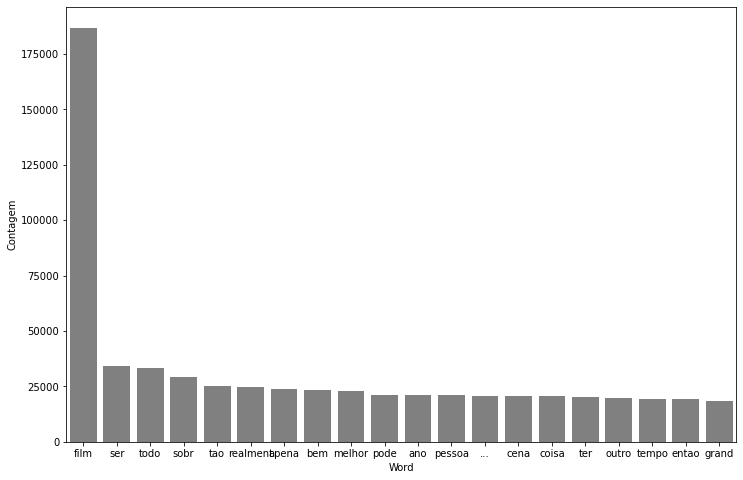

In [14]:
wordsFrequencyBar(20)

In [15]:
# create the bag of words structure
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
X = dataset.loc[:, 'treatment'].values
print(X)

['vez sr costner arrum film tempo necessario alem terrivei sequencia resgat mar quai pouca simplesment importei nenhum personagen maioria fantasma armario personagem coster realizado logo inicio esquecido tard importava personagem deveriamo importar arrogant superconfiant ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinai armario desordenado unico obstaculo parec estar vencendo costner finalment bem alem meio caminho costner conta sobr fantasma kutcher informado kutcher levado ser melhor pressentimento pressagio anterior nenhuma magica aqui tudo podia fazer desligar hora'
 'exemplo motivo maioria film acao generico chato nada valha pena assistir aqui completo desperdicio talento ice t cubo gelo mal aproveitado cada comprovando capaz atuar agir bem incomod va ver new jack citi ricochet assistir new york undercov ice t boyz hood higher learn friday ice cube ver negocio real ice ts horrivelment clich dialogo sozinho faz film ralar dent ainda perguntan

In [16]:
# fit and transform
X = cv.fit_transform(X).toarray()

In [17]:
# show the bag of words X matrix
print(X)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 2 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
# create the train and test dataset using bag of words
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [19]:
# show y train
print(y_train)

[0 0 0 ... 1 0 1]


In [20]:
# negative review to predict, using words to try to make a fool of AI
portuguese_negative_review = ['Bem mais ou menos, já vi muitos melhores sobre o mesmo tema.']
# positive review to predict, using words to try to make a fool of AI
portuguese_positive_review = ['Já vi muito filme ruim, bem ruim mesmo, sobre o tema. Mas este é incrível!!!']


In [21]:
# linear regression model using bag of words
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train,y_train)
accuracy = lr.score(X_test,y_test)

In [22]:
# accurary using bag of words
print(accuracy)

0.8553376465830974


In [23]:
# predict the negative review
portuguese_negative_review_transformed = cv.transform(portuguese_negative_review).toarray()
lr.predict(portuguese_negative_review_transformed)

array([1])

In [24]:
# predict the negative review
portuguese_positive_review_transformed = cv.transform(portuguese_positive_review).toarray()
lr.predict(portuguese_positive_review_transformed)

array([0])

In [25]:
# create TF-IDF matrix to test with the linear regression model
from sklearn.feature_extraction.text import TfidfVectorizer

# object TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

# create the matrix in extra variable
X_2 = tfidf.fit_transform(dataset["treatment"])

# create the train and test dataset using TF-IDF
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42, test_size=0.2)

# linear regression using TF-IDF
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train,y_train)
accuracy = lr.score(X_test,y_test)
print(accuracy)

0.6939951475940154


In [26]:
# predict the negative review
portuguese_negative_review_transformed = tfidf.transform(portuguese_negative_review)
lr.predict(portuguese_negative_review_transformed)

array([1])

In [27]:
# predict the negative review
portuguese_positive_review_transformed = tfidf.transform(portuguese_positive_review)
lr.predict(portuguese_positive_review_transformed)

array([0])

In [28]:
# create TF-IDF matrix to test with the linear regression model using ngram
from nltk import ngrams

# object TfidfVectorizer with ngram
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

# create the matrix in extra variable
X_3 = tfidf.fit_transform(dataset["treatment"])

# create the train and test dataset using TF-IDF with ngram
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y, random_state=42, test_size=0.2)

# linear regression using TF-IDF with ngram
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train,y_train)
accuracy = lr.score(X_test,y_test)
print(accuracy)

0.8840477153255155


In [29]:
# predict the negative review
portuguese_negative_review_transformed = tfidf.transform(portuguese_negative_review)
lr.predict(portuguese_negative_review_transformed)

array([1])

In [30]:
# predict the negative review
portuguese_positive_review_transformed = tfidf.transform(portuguese_positive_review)
lr.predict(portuguese_positive_review_transformed)

array([0])